# German Tweet Visualisation

This notebook contains the visualisations of German data in GermEval 2019 Task 2.

In [1]:
import pandas as pd

train_2018 = pd.read_csv("data/german/germeval2018.training.txt", sep='\t',
                             names=['tweet', 'sub_task_1', 'sub_task_2'])

train_2019 = pd.read_csv("data/german/germeval2019_training_subtask12.txt", sep='\t',
                             names=['tweet', 'sub_task_1', 'sub_task_2'])

full = pd.concat([train_2018, train_2019])
full[:10]

tweet sub_task_1 sub_task_2
0  @corinnamilborn Liebe Corinna, wir würden dich...      OTHER      OTHER
1  @Martin28a Sie haben ja auch Recht. Unser Twee...      OTHER      OTHER
2  @ahrens_theo fröhlicher gruß aus der schönsten...      OTHER      OTHER
3  @dushanwegner Amis hätten alles und jeden gewä...      OTHER      OTHER
4  @spdde kein verläßlicher Verhandlungspartner. ...    OFFENSE     INSULT
5  @Dirki_M Ja, aber wo widersprechen die Zahlen ...      OTHER      OTHER
6  @milenahanm 33 bis 45 habe ich noch gar nicht ...    OFFENSE  PROFANITY
7  @jayxderxmensch @jayxthexhuman Wieso? Was find...      OTHER      OTHER
8  @tagesschau Euere AfD Hetze wirkt. Da könnt ih...    OFFENSE      ABUSE
9  Deutsche Medien, Halbwahrheiten und einseitige...    OFFENSE      ABUSE

## Sub Task 1

The task is to decide whether a tweet includes some form of offensive language or not.

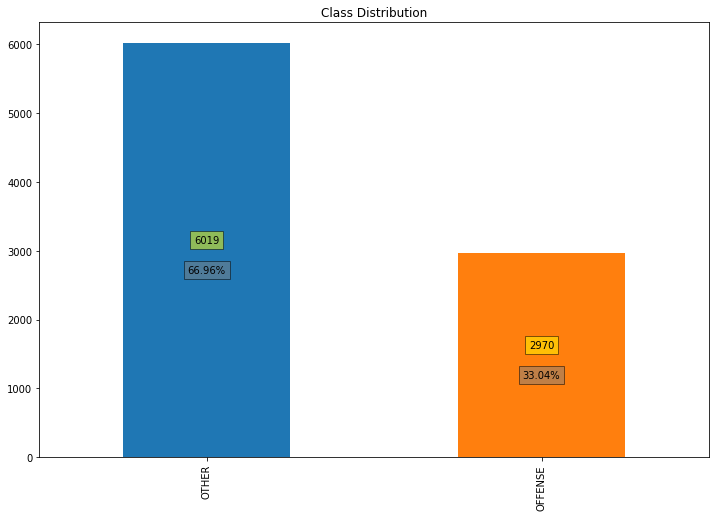

In [3]:
from visualisation import plot_data

plot_data(full, "sub_task_1")

In [4]:
from preprocessing import remove_url

TEXT_COLUMN = "tweet"
full[TEXT_COLUMN] = full[TEXT_COLUMN].apply(lambda x: remove_url(x))

In [5]:
from visualisation import plot_word_cloud

OTHER = full[(full['sub_task_1'] == 'OTHER')]
OFFENSE = full[(full['sub_task_1'] == 'OFFENSE')]


word cloud for not offensive posts

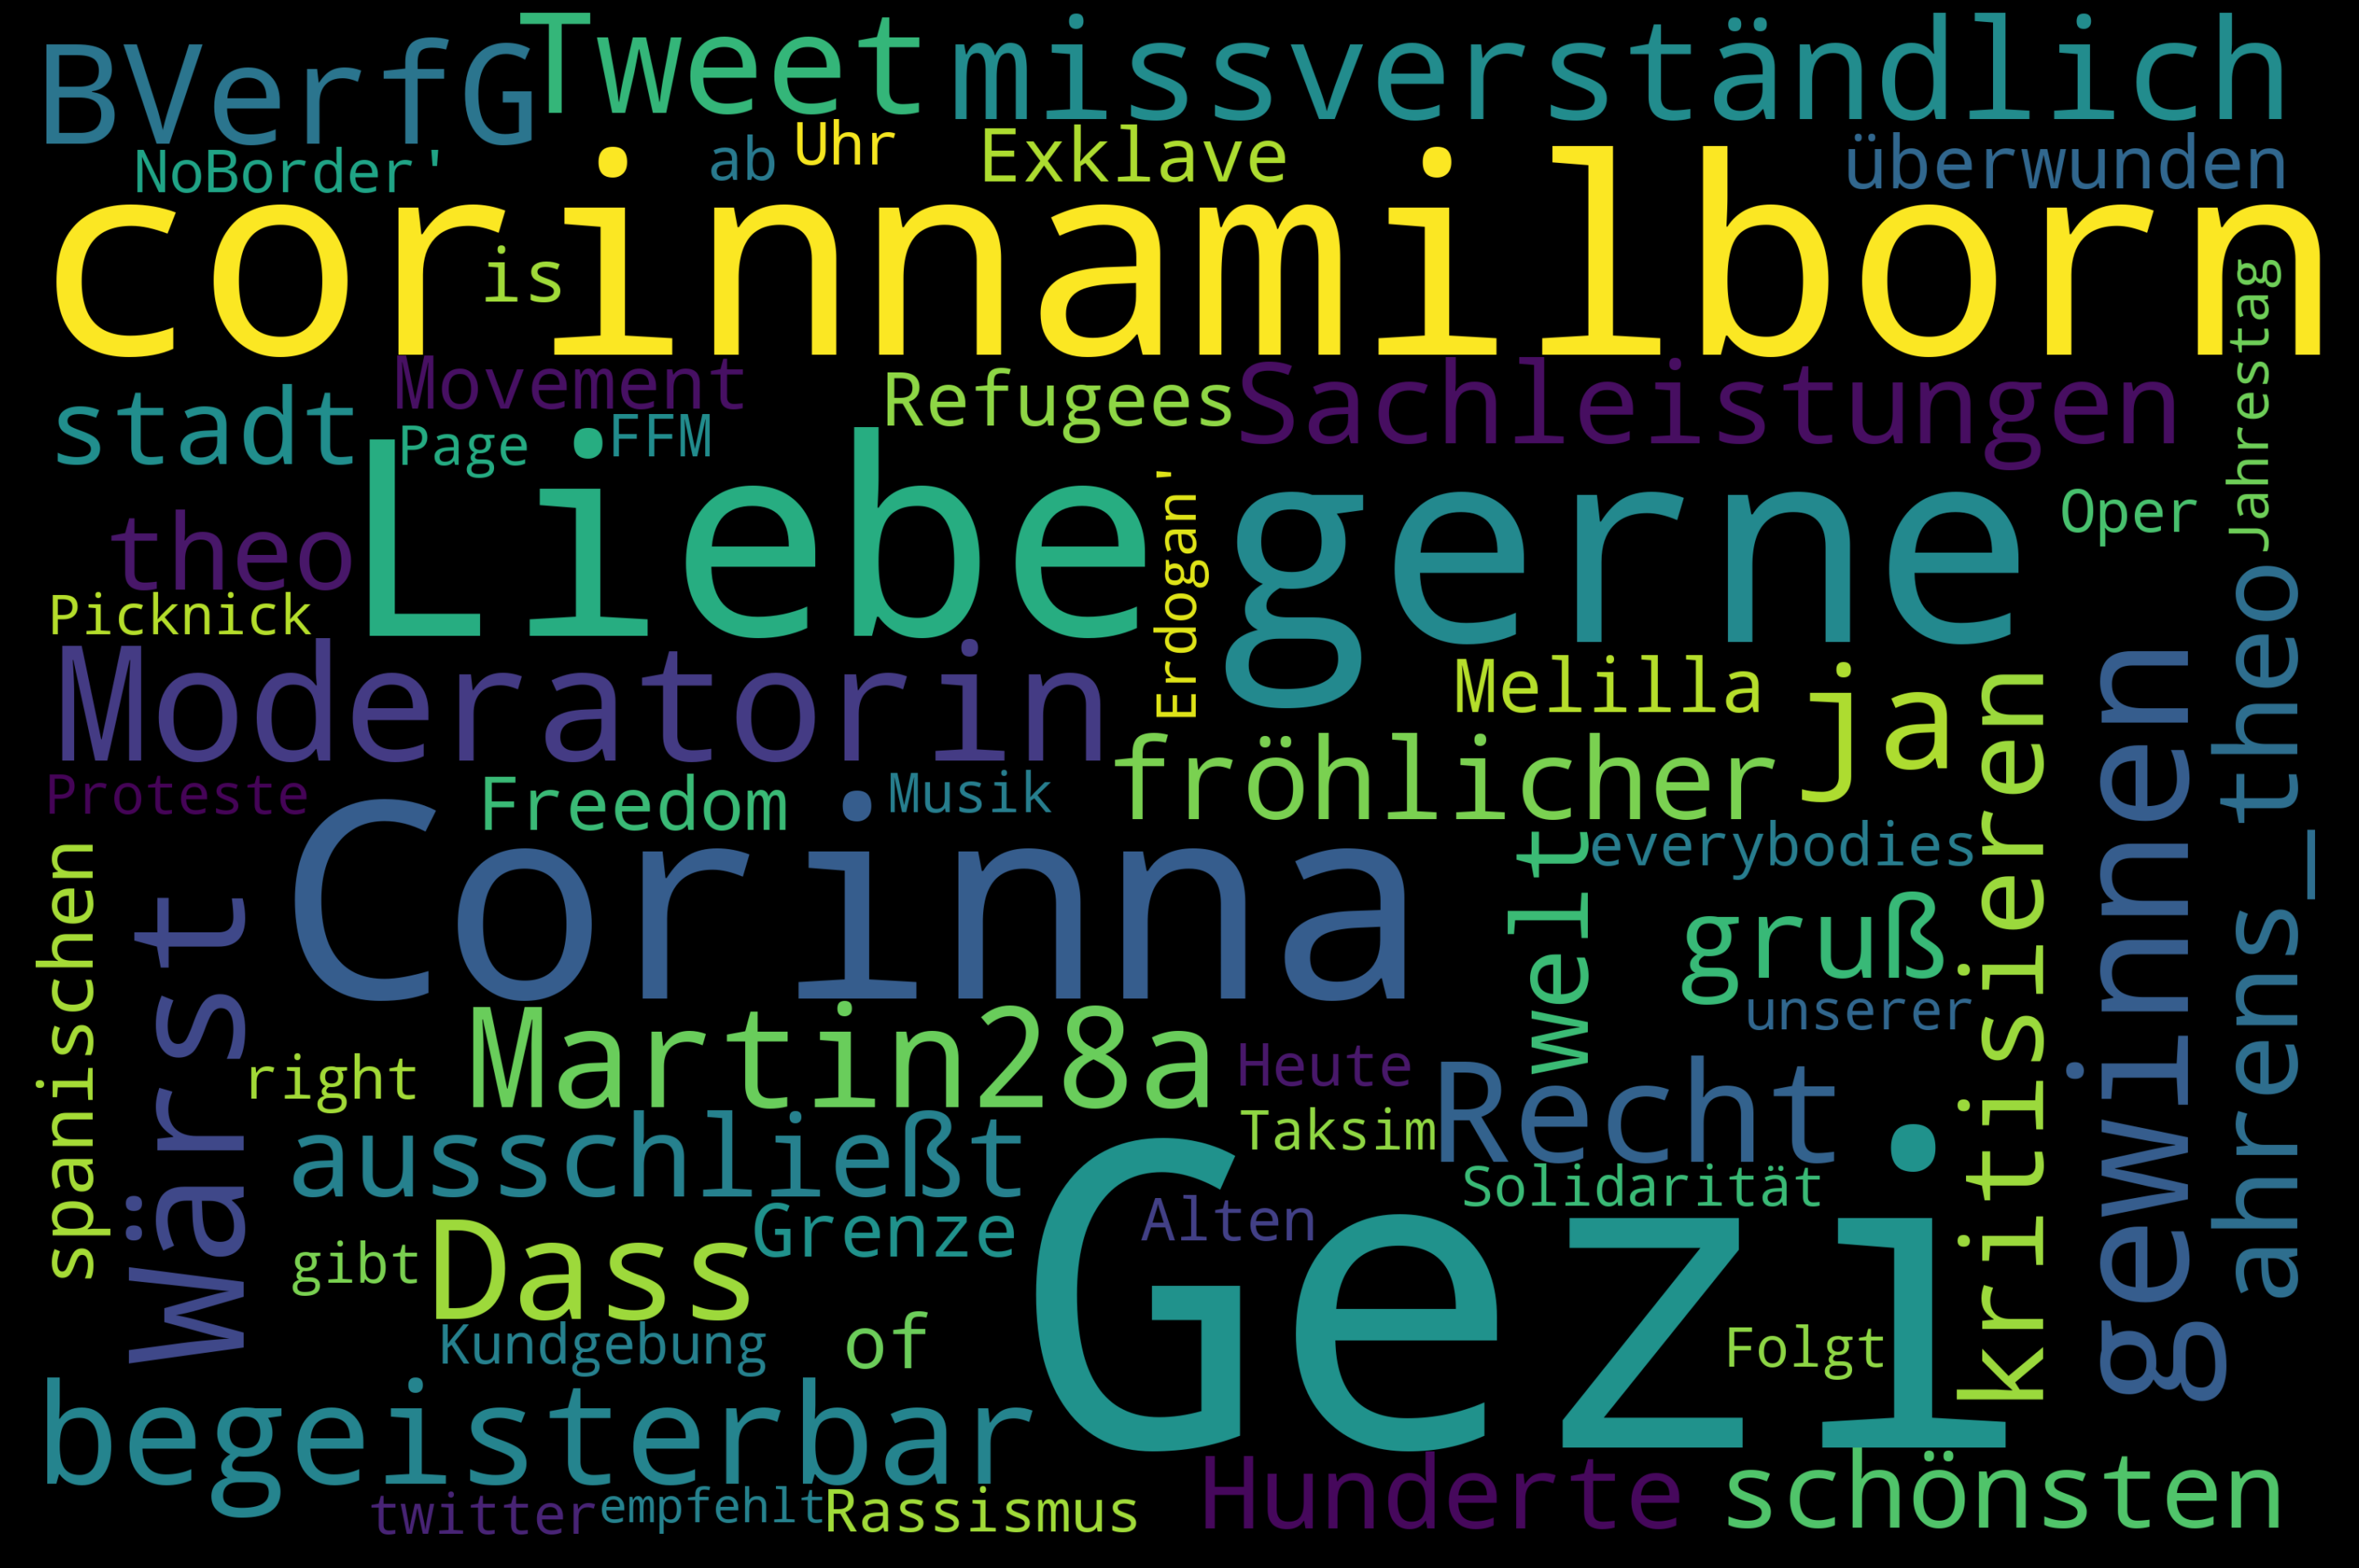

In [6]:
plot_word_cloud(OTHER)

word cloud for offensive posts

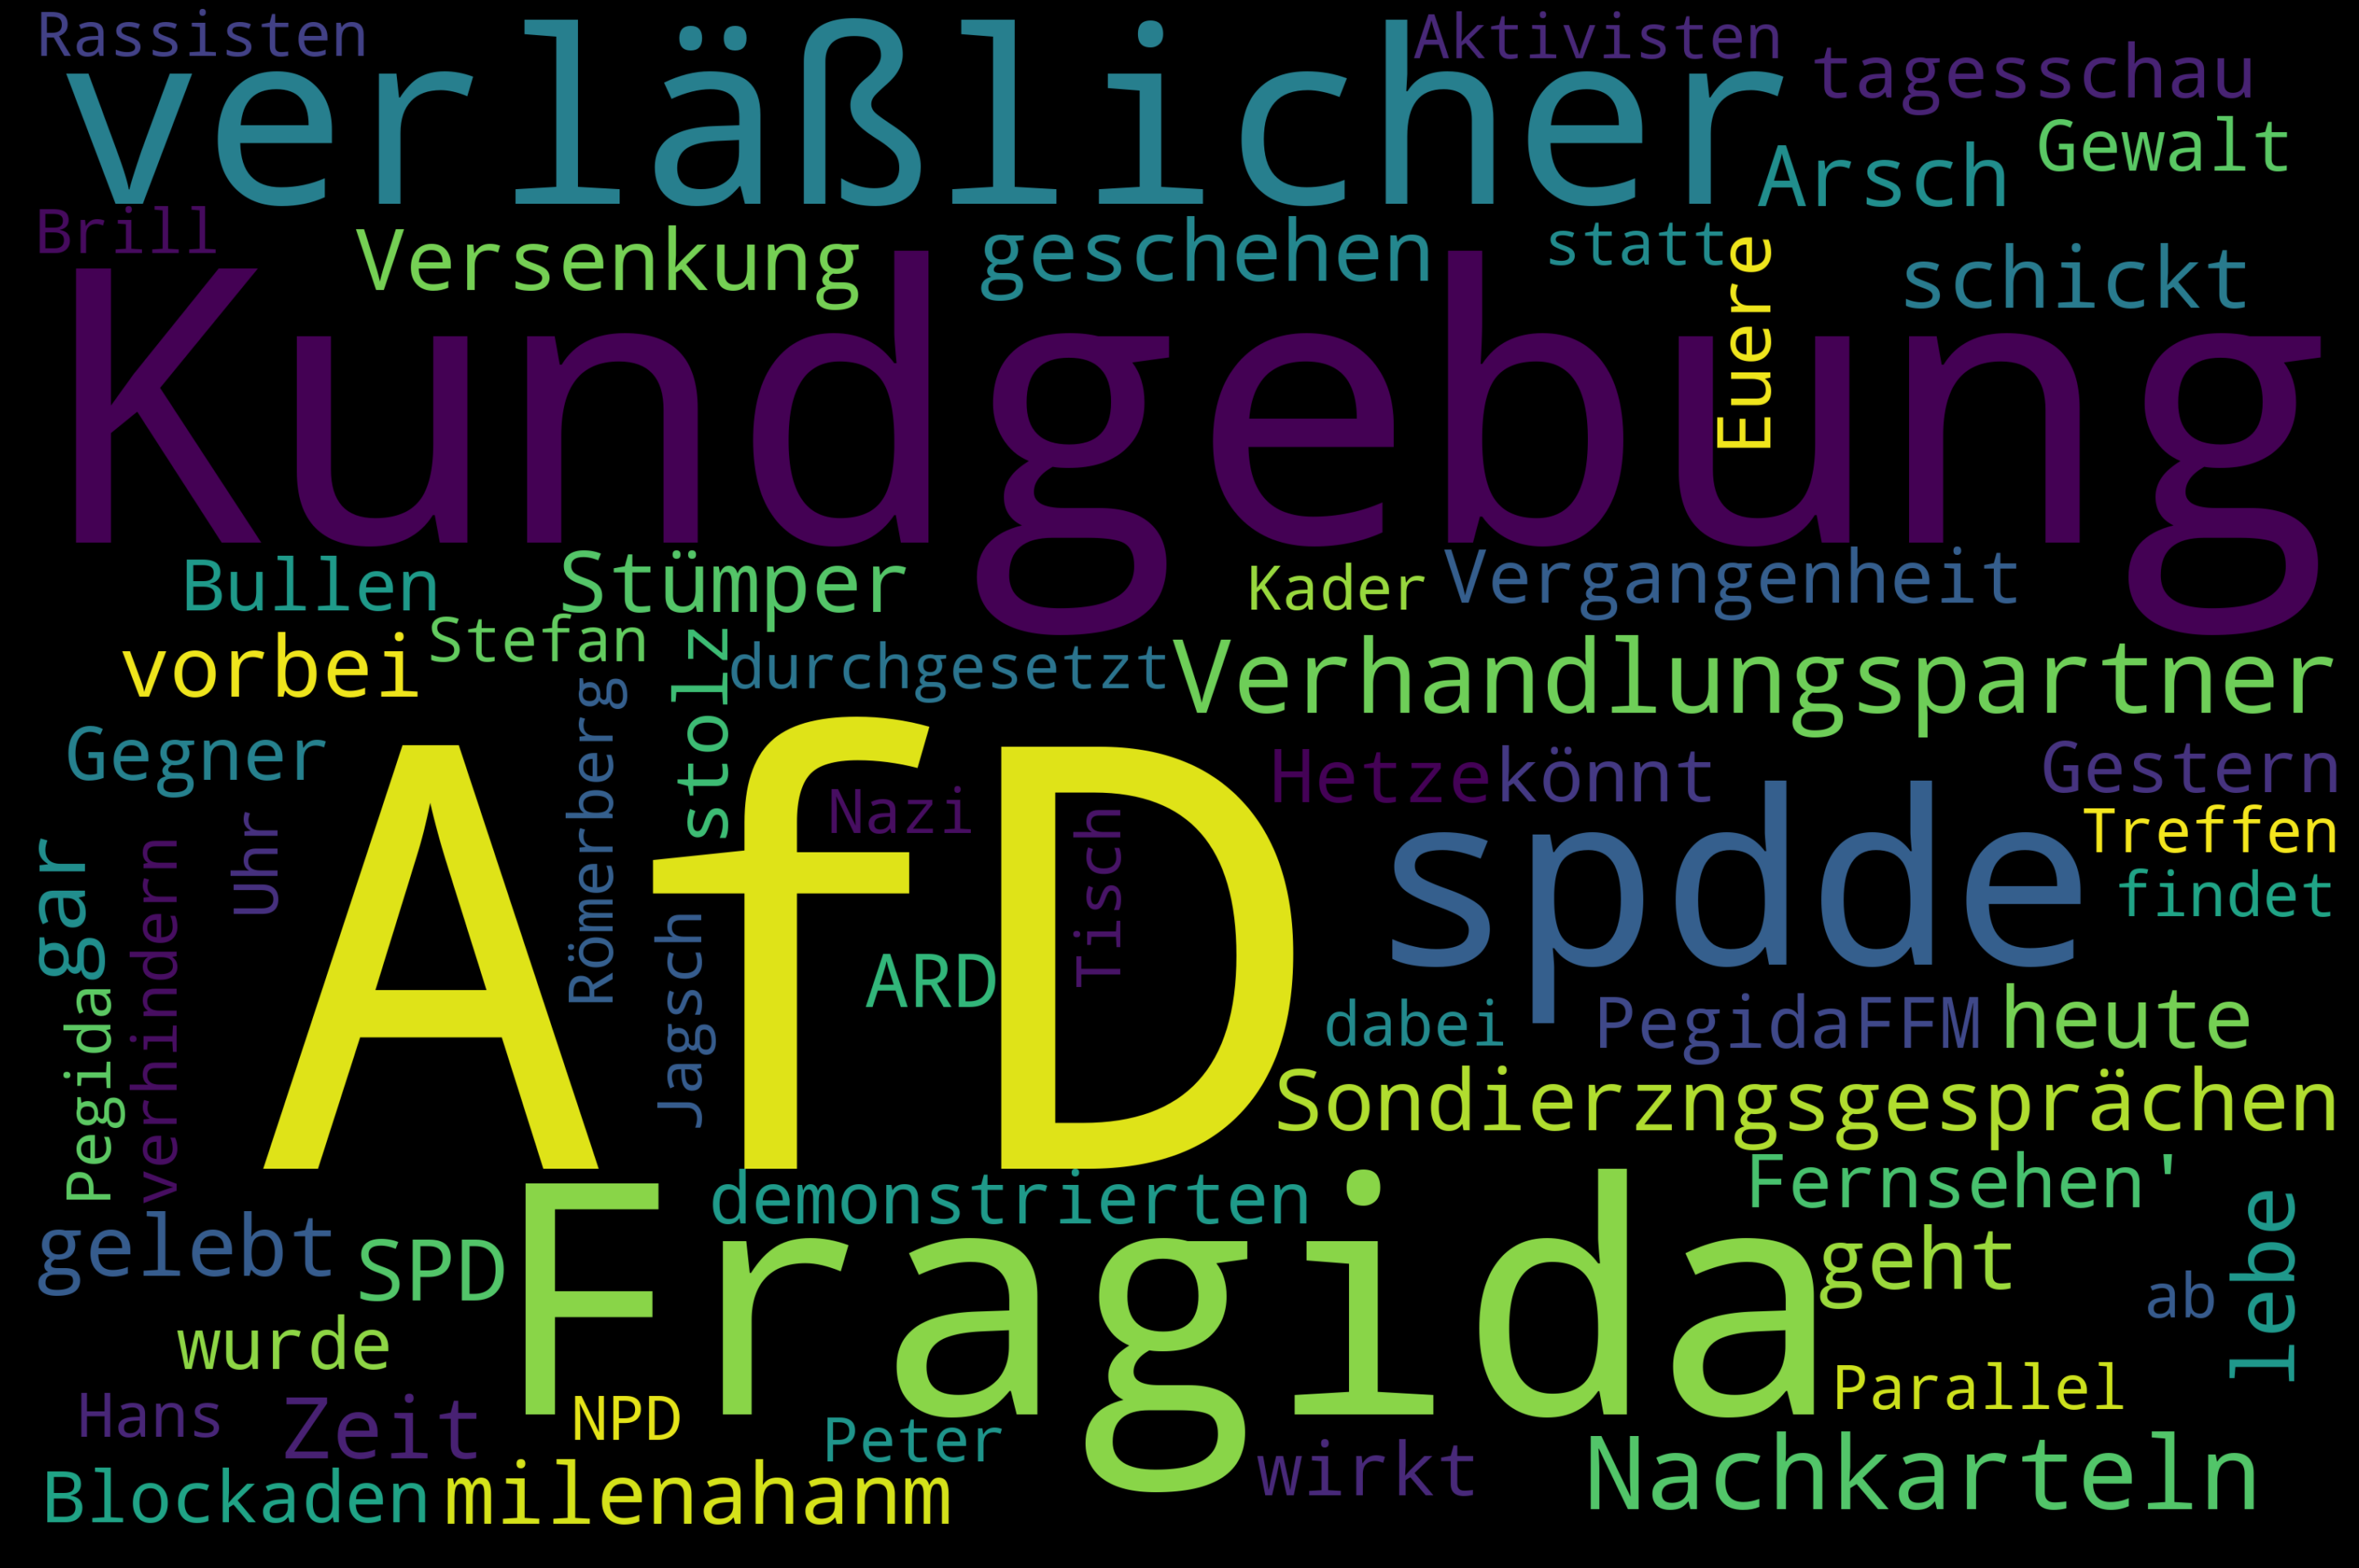

In [7]:
plot_word_cloud(OFFENSE)

## Subtask II — Fine-grained classification

In addition to detecting offensive language tweets, we distinguish between three subcategories:

* PROFANITY: usage of profane words, however, the tweet clearly does not want to insult anyone.

* INSULT: unlike PROFANITY the tweet clearly wants to offend someone.

* ABUSE: unlike INSULT, the tweet does not just insult a person but represents the stronger form of abusive language

In [8]:
is_offense = full['sub_task_1'] == 'OFFENSE'
offense = full[is_offense]
offense[:10]

tweet sub_task_1 sub_task_2
4   @spdde kein verläßlicher Verhandlungspartner. ...    OFFENSE     INSULT
6   @milenahanm 33 bis 45 habe ich noch gar nicht ...    OFFENSE  PROFANITY
8   @tagesschau Euere AfD Hetze wirkt. Da könnt ih...    OFFENSE      ABUSE
9   Deutsche Medien, Halbwahrheiten und einseitige...    OFFENSE      ABUSE
11  @Ralf_Stegner Oman Ralle..dich mag ja immer no...    OFFENSE     INSULT
16  Für mich ist der morgige Tag ein Tag der "Größ...    OFFENSE      ABUSE
26  @krippmarie Ich kenne noch einige Namen unter ...    OFFENSE      ABUSE
32  @ndaktuell Ach Gott mehr nicht,was gedenkt man...    OFFENSE      ABUSE
41  @BlauekeP @poschuetzge @lawyerberlin @Die_Grue...    OFFENSE      ABUSE
43  @monikabergholz2 Wir haben keine Meinungsfreih...    OFFENSE      ABUSE

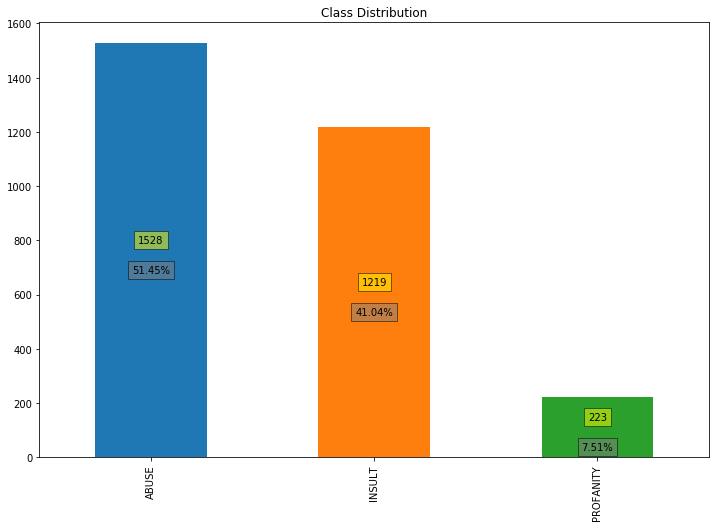

In [9]:
plot_data(offense, "sub_task_2")

In [10]:
ABUSE = offense[(offense['sub_task_2'] == 'ABUSE')]
INSULT = offense[(offense['sub_task_2'] == 'INSULT')]
PROFANITY = offense[(offense['sub_task_2'] == 'PROFANITY')]

word cloud for abuse content

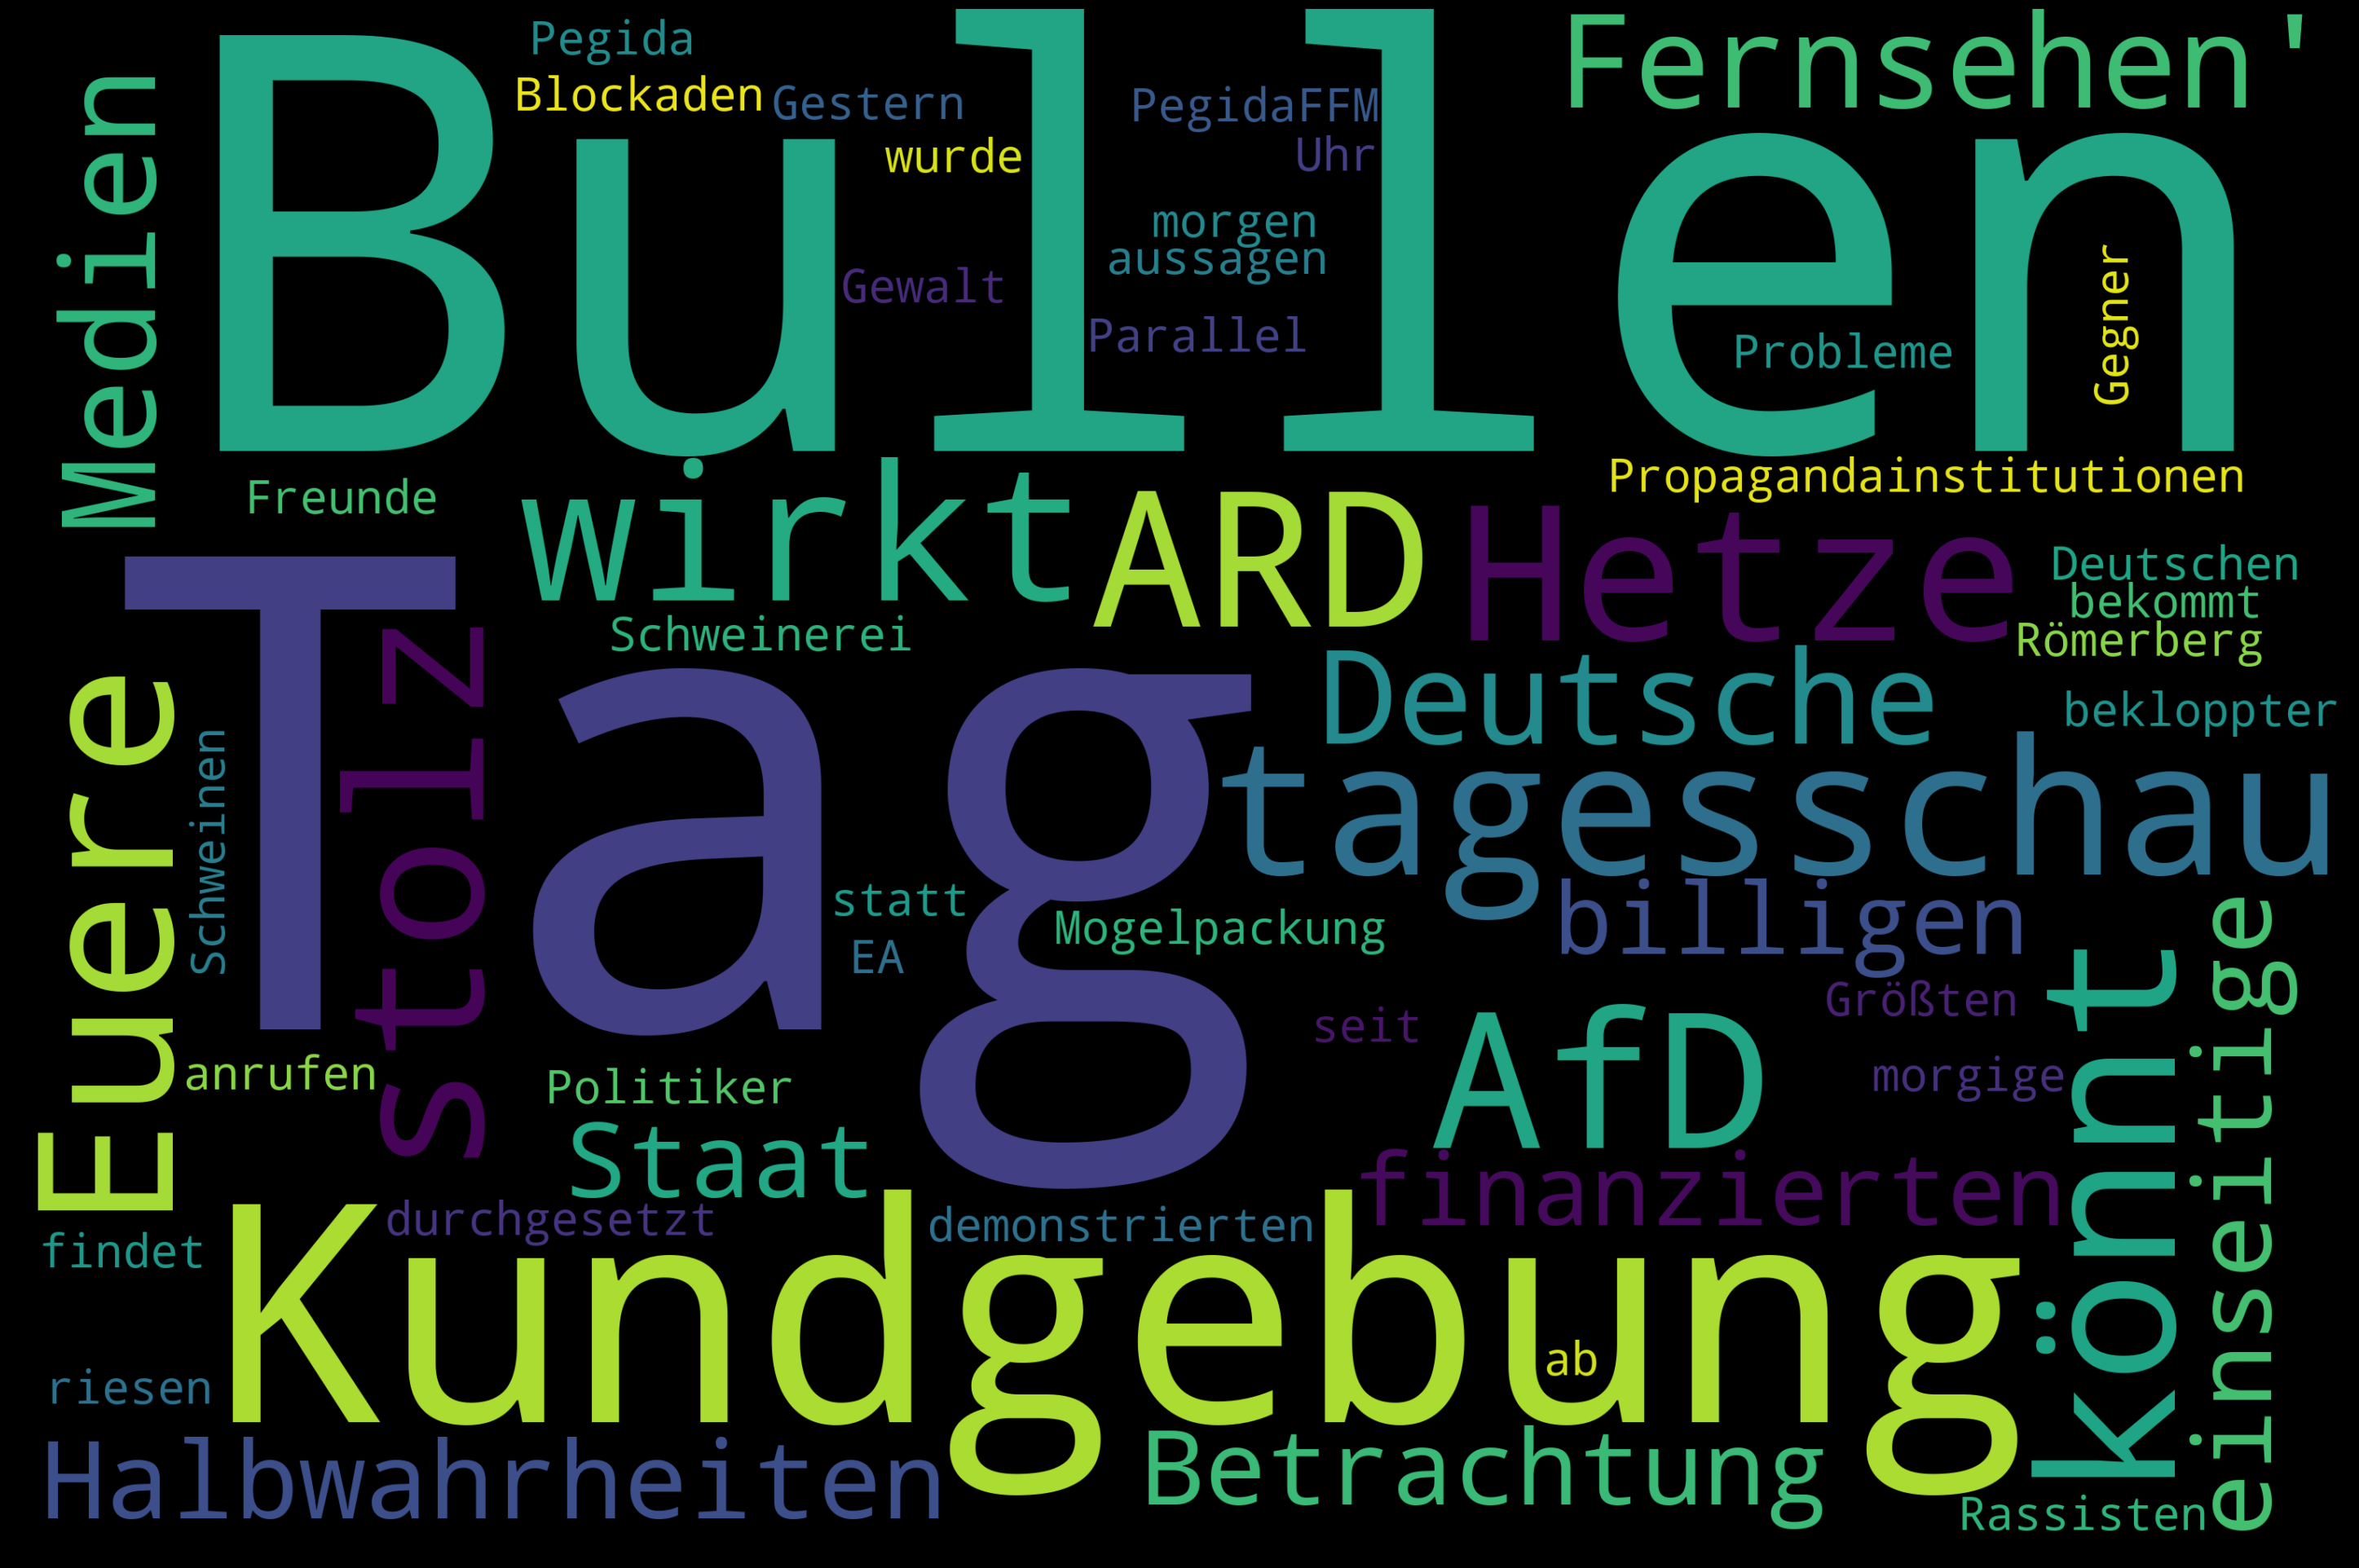

In [11]:
plot_word_cloud(ABUSE)

word cloud for insult content

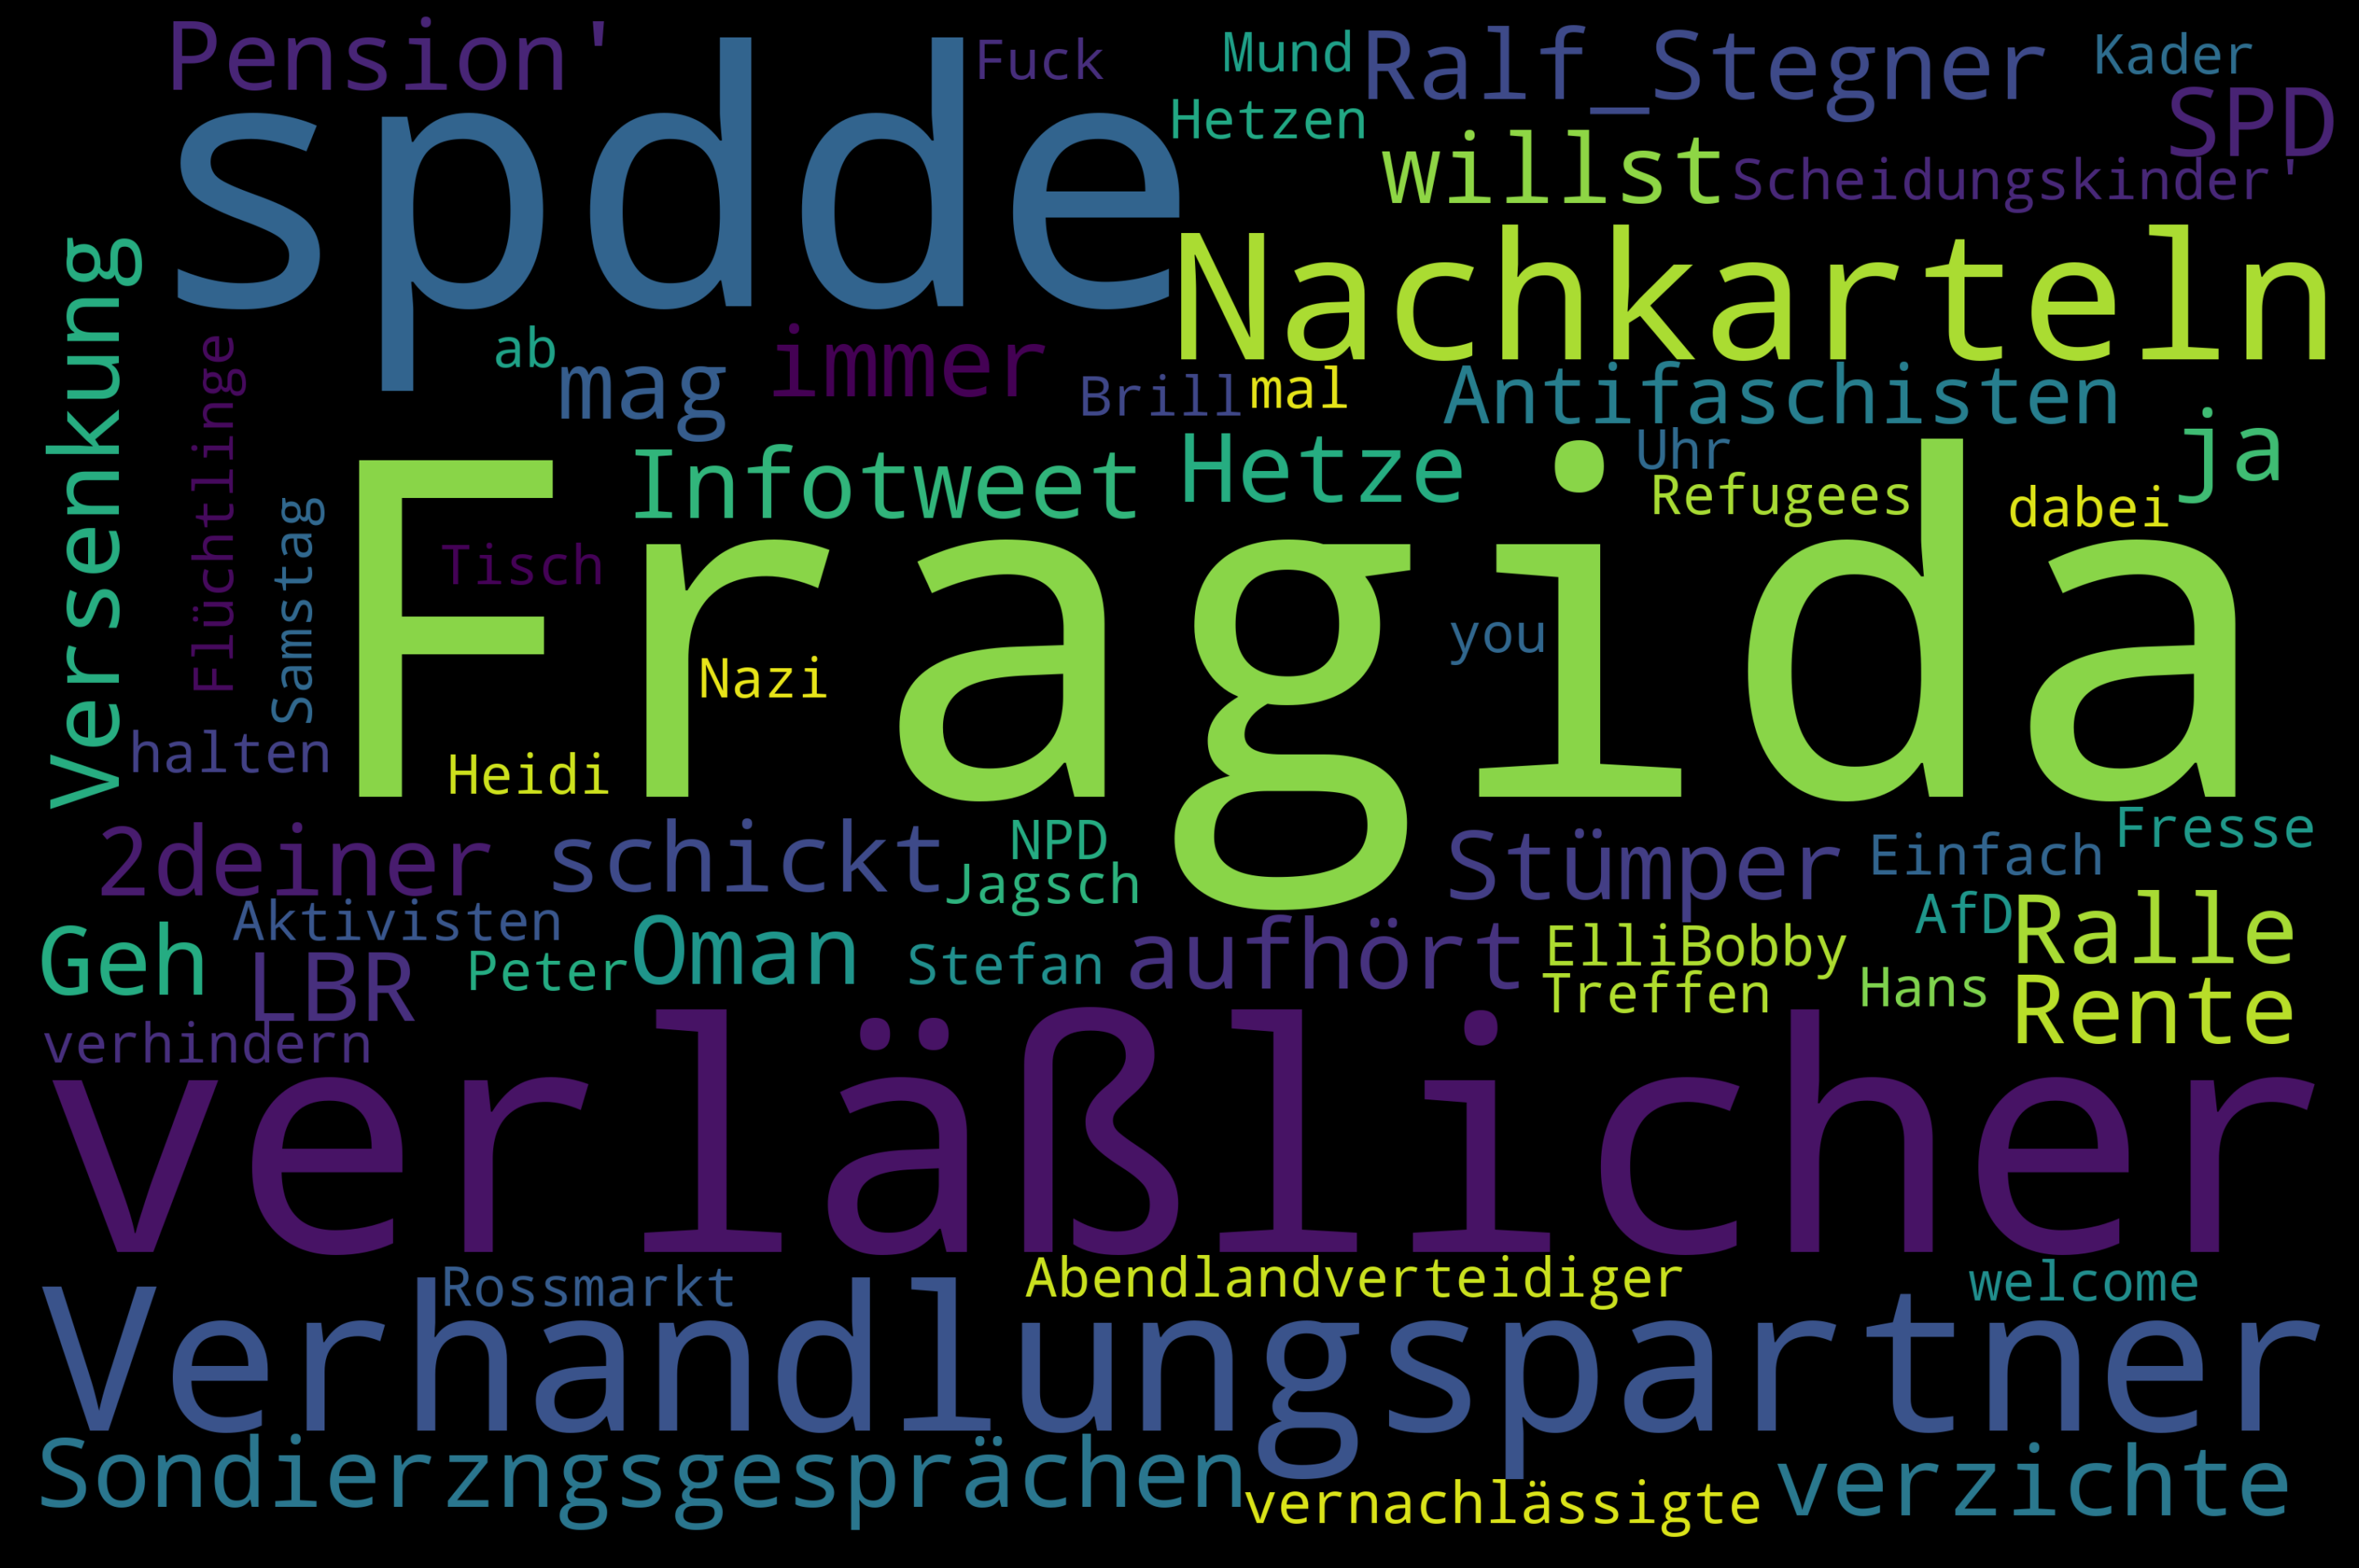

In [12]:
plot_word_cloud(INSULT)

word cloud for profanity content

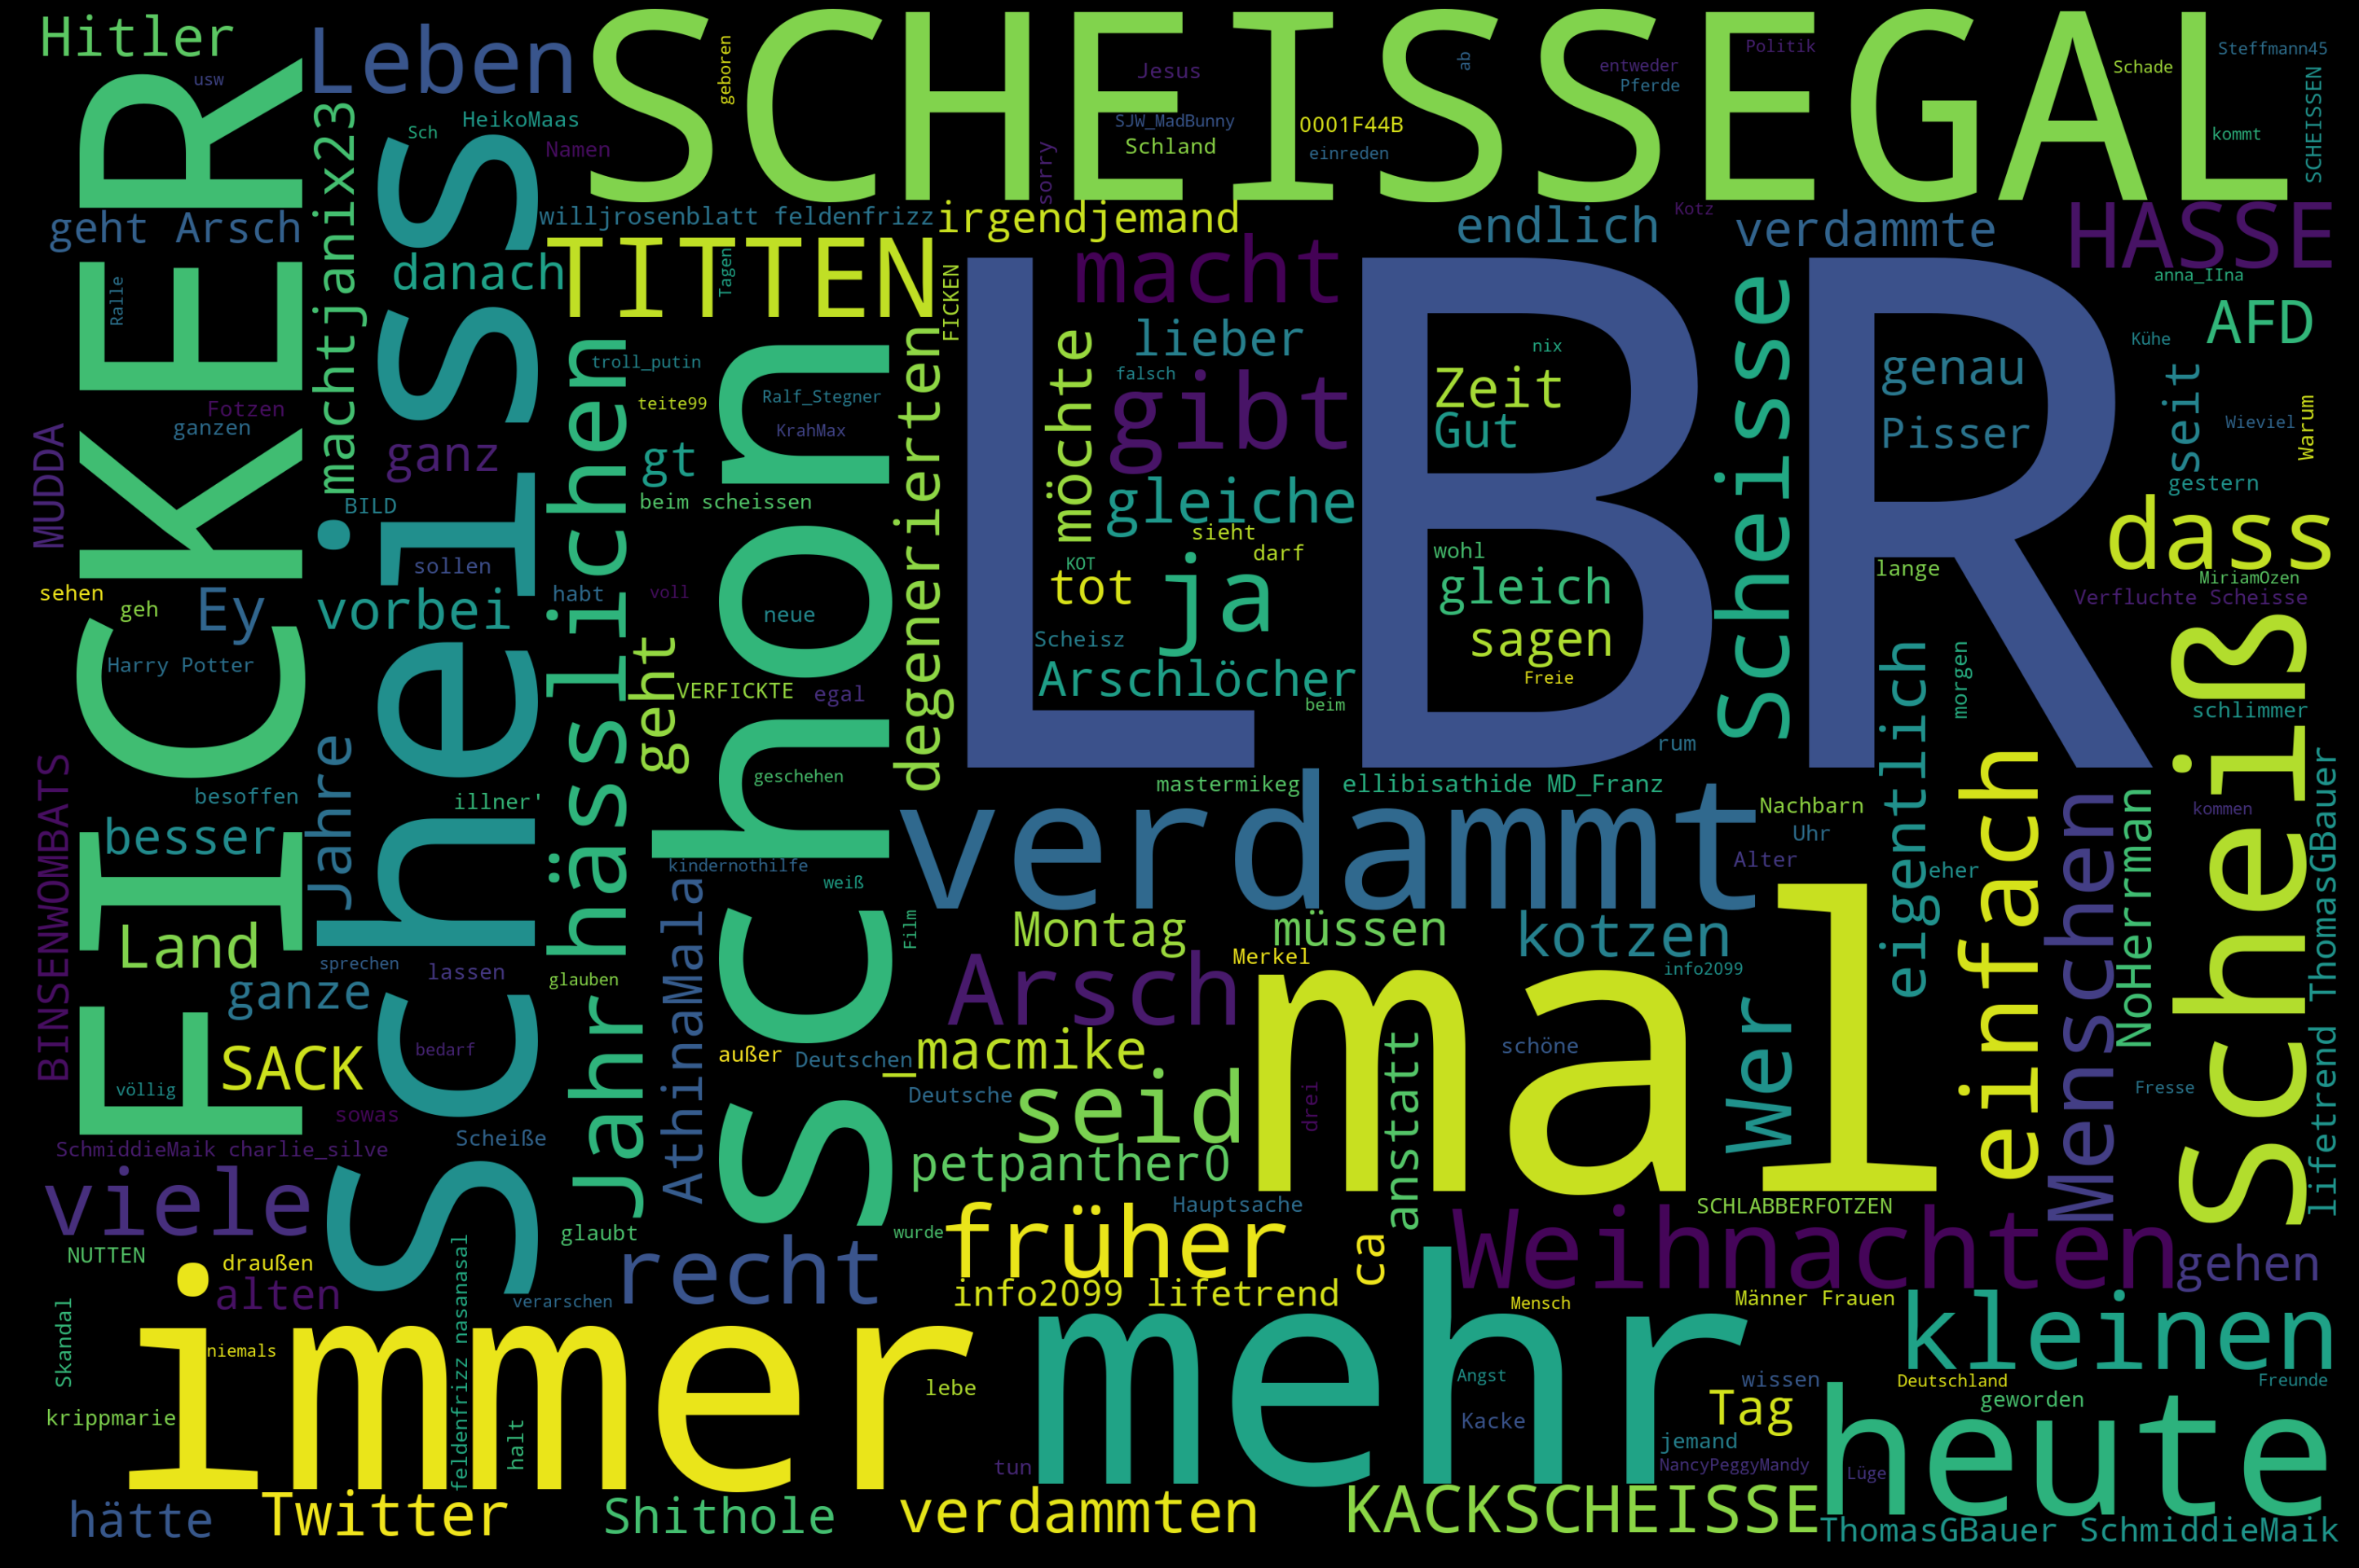

In [13]:
plot_word_cloud(PROFANITY)

## Subtask III – Classification of explicit and implicit offensive language

In addition to detecting offensive language tweets, we distinguish between two subcategories:

* EXPLICIT: an offensive tweet which directly expresses hate, condemnation, superiority towards an explicitly or implicitly given target

 
* IMPLICIT:  an offensive tweet where the expression of hate, condemnation, superiority etc. as directed towards an explicitly or implicitly given target has to be inferred from the ascription of (hypothesized) target properties that are insulting, degrading, offending, humiliating etc.



In [14]:
train_2019 = pd.read_csv("data/german/germeval2019.training_subtask3.txt", sep='\t',
                             names=['tweet', 'sub_task_1', 'sub_task_2', 'sub_task_3'])
train_2019[:10]

tweet sub_task_1 sub_task_2  \
0  @spdde kein verläßlicher Verhandlungspartner. ...    OFFENSE     INSULT   
1  @milenahanm 33 bis 45 habe ich noch gar nicht ...    OFFENSE  PROFANITY   
2  @tagesschau Euere AfD Hetze wirkt. Da könnt ih...    OFFENSE      ABUSE   
3  Deutsche Medien, Halbwahrheiten und einseitige...    OFFENSE      ABUSE   
4  @Ralf_Stegner Oman Ralle..dich mag ja immer no...    OFFENSE     INSULT   
5  @krippmarie Ich kenne noch einige Namen unter ...    OFFENSE      ABUSE   
6  @BlauekeP @poschuetzge @lawyerberlin @Die_Grue...    OFFENSE      ABUSE   
7  @monikabergholz2 Wir haben keine Meinungsfreih...    OFFENSE      ABUSE   
8  Infotweet: Antifaschisten sind alle vernachläs...    OFFENSE     INSULT   
9  @MartinaRenner @dieLinke Und die Linken Anarch...    OFFENSE      ABUSE   

  sub_task_3  
0   EXPLICIT  
1   EXPLICIT  
2   EXPLICIT  
3   EXPLICIT  
4   EXPLICIT  
5   IMPLICIT  
6   IMPLICIT  
7   EXPLICIT  
8   EXPLICIT  
9   EXPLICIT

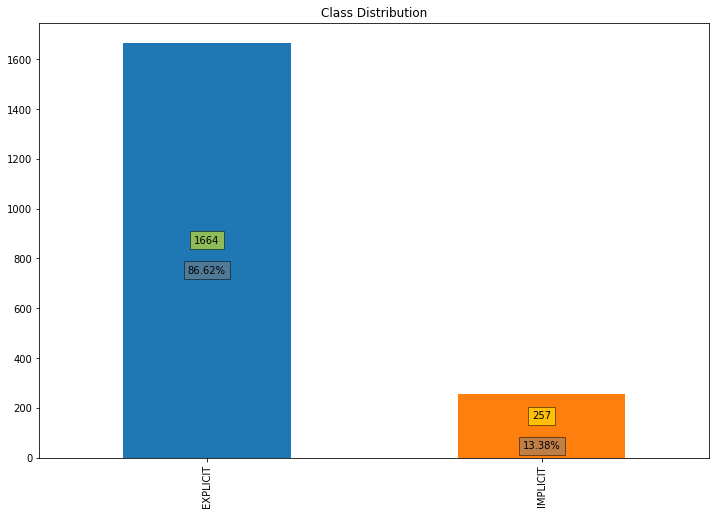

In [15]:
plot_data(train_2019, "sub_task_3")

In [16]:
IMPLICIT = train_2019[(train_2019['sub_task_3'] == 'IMPLICIT')]
EXPLICIT = train_2019[(train_2019['sub_task_3'] == 'EXPLICIT')]

word cloud for implicit content

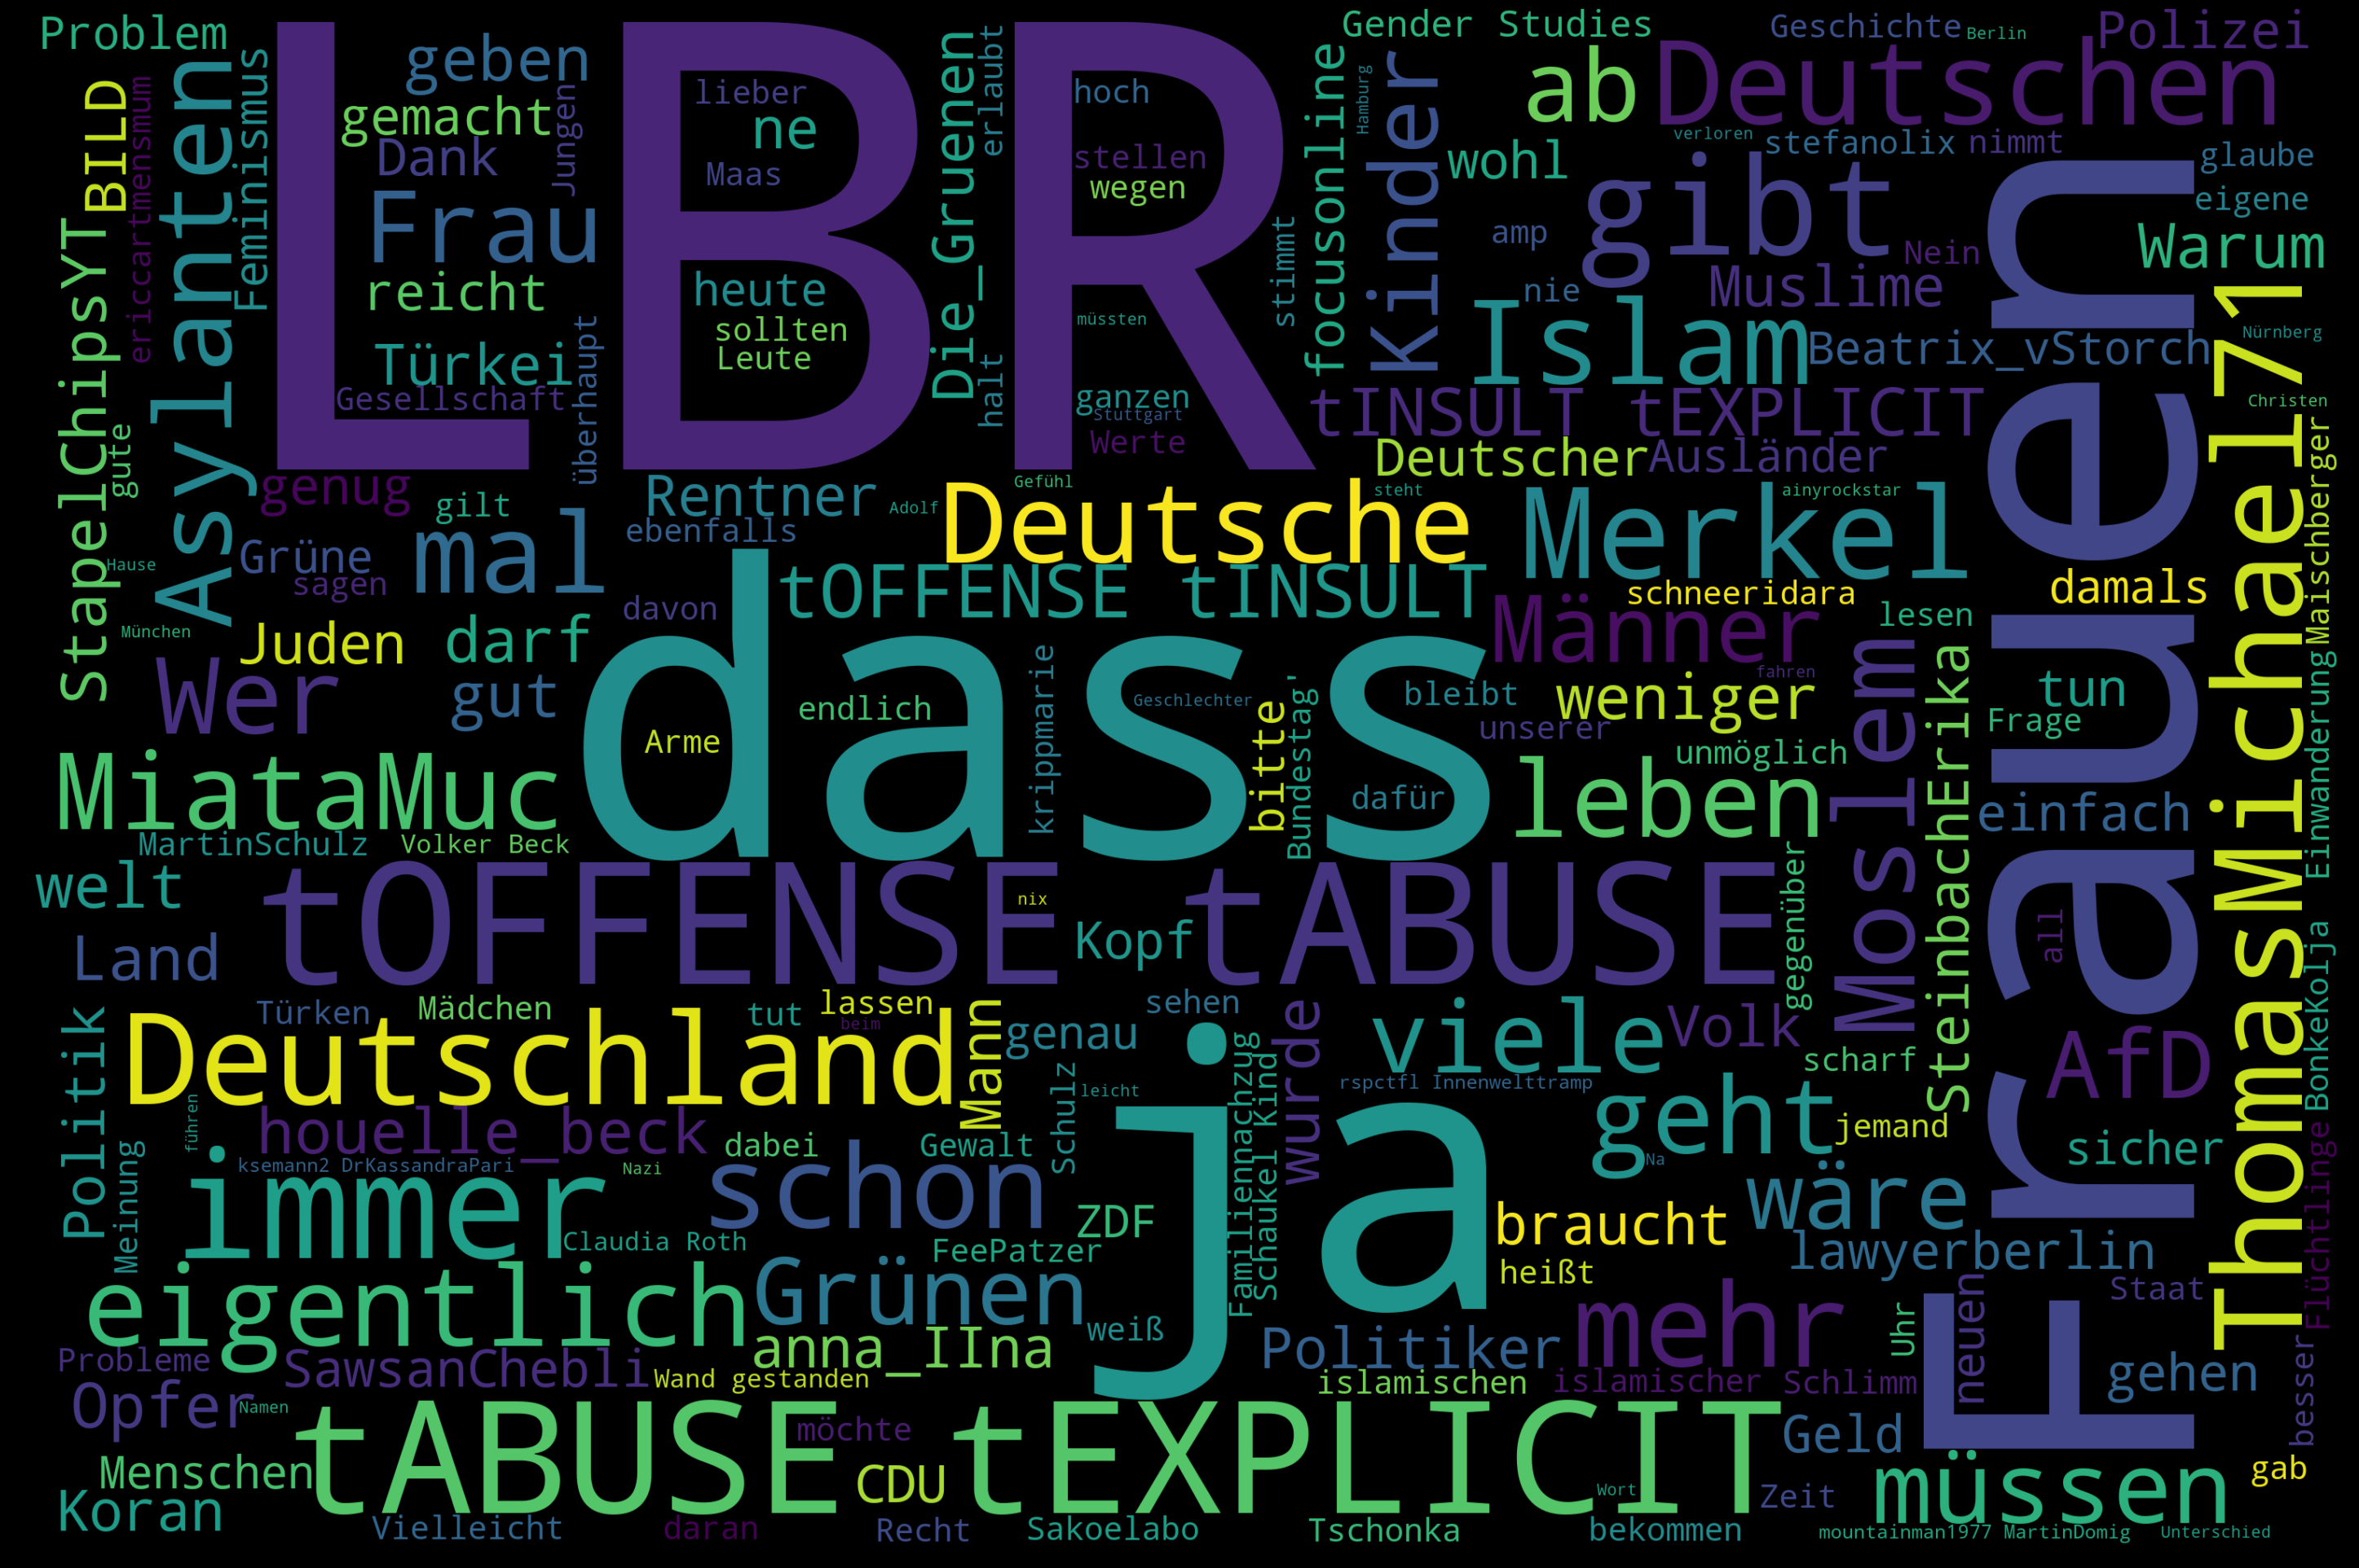

In [17]:
plot_word_cloud(IMPLICIT)

word cloud for exiplicit content

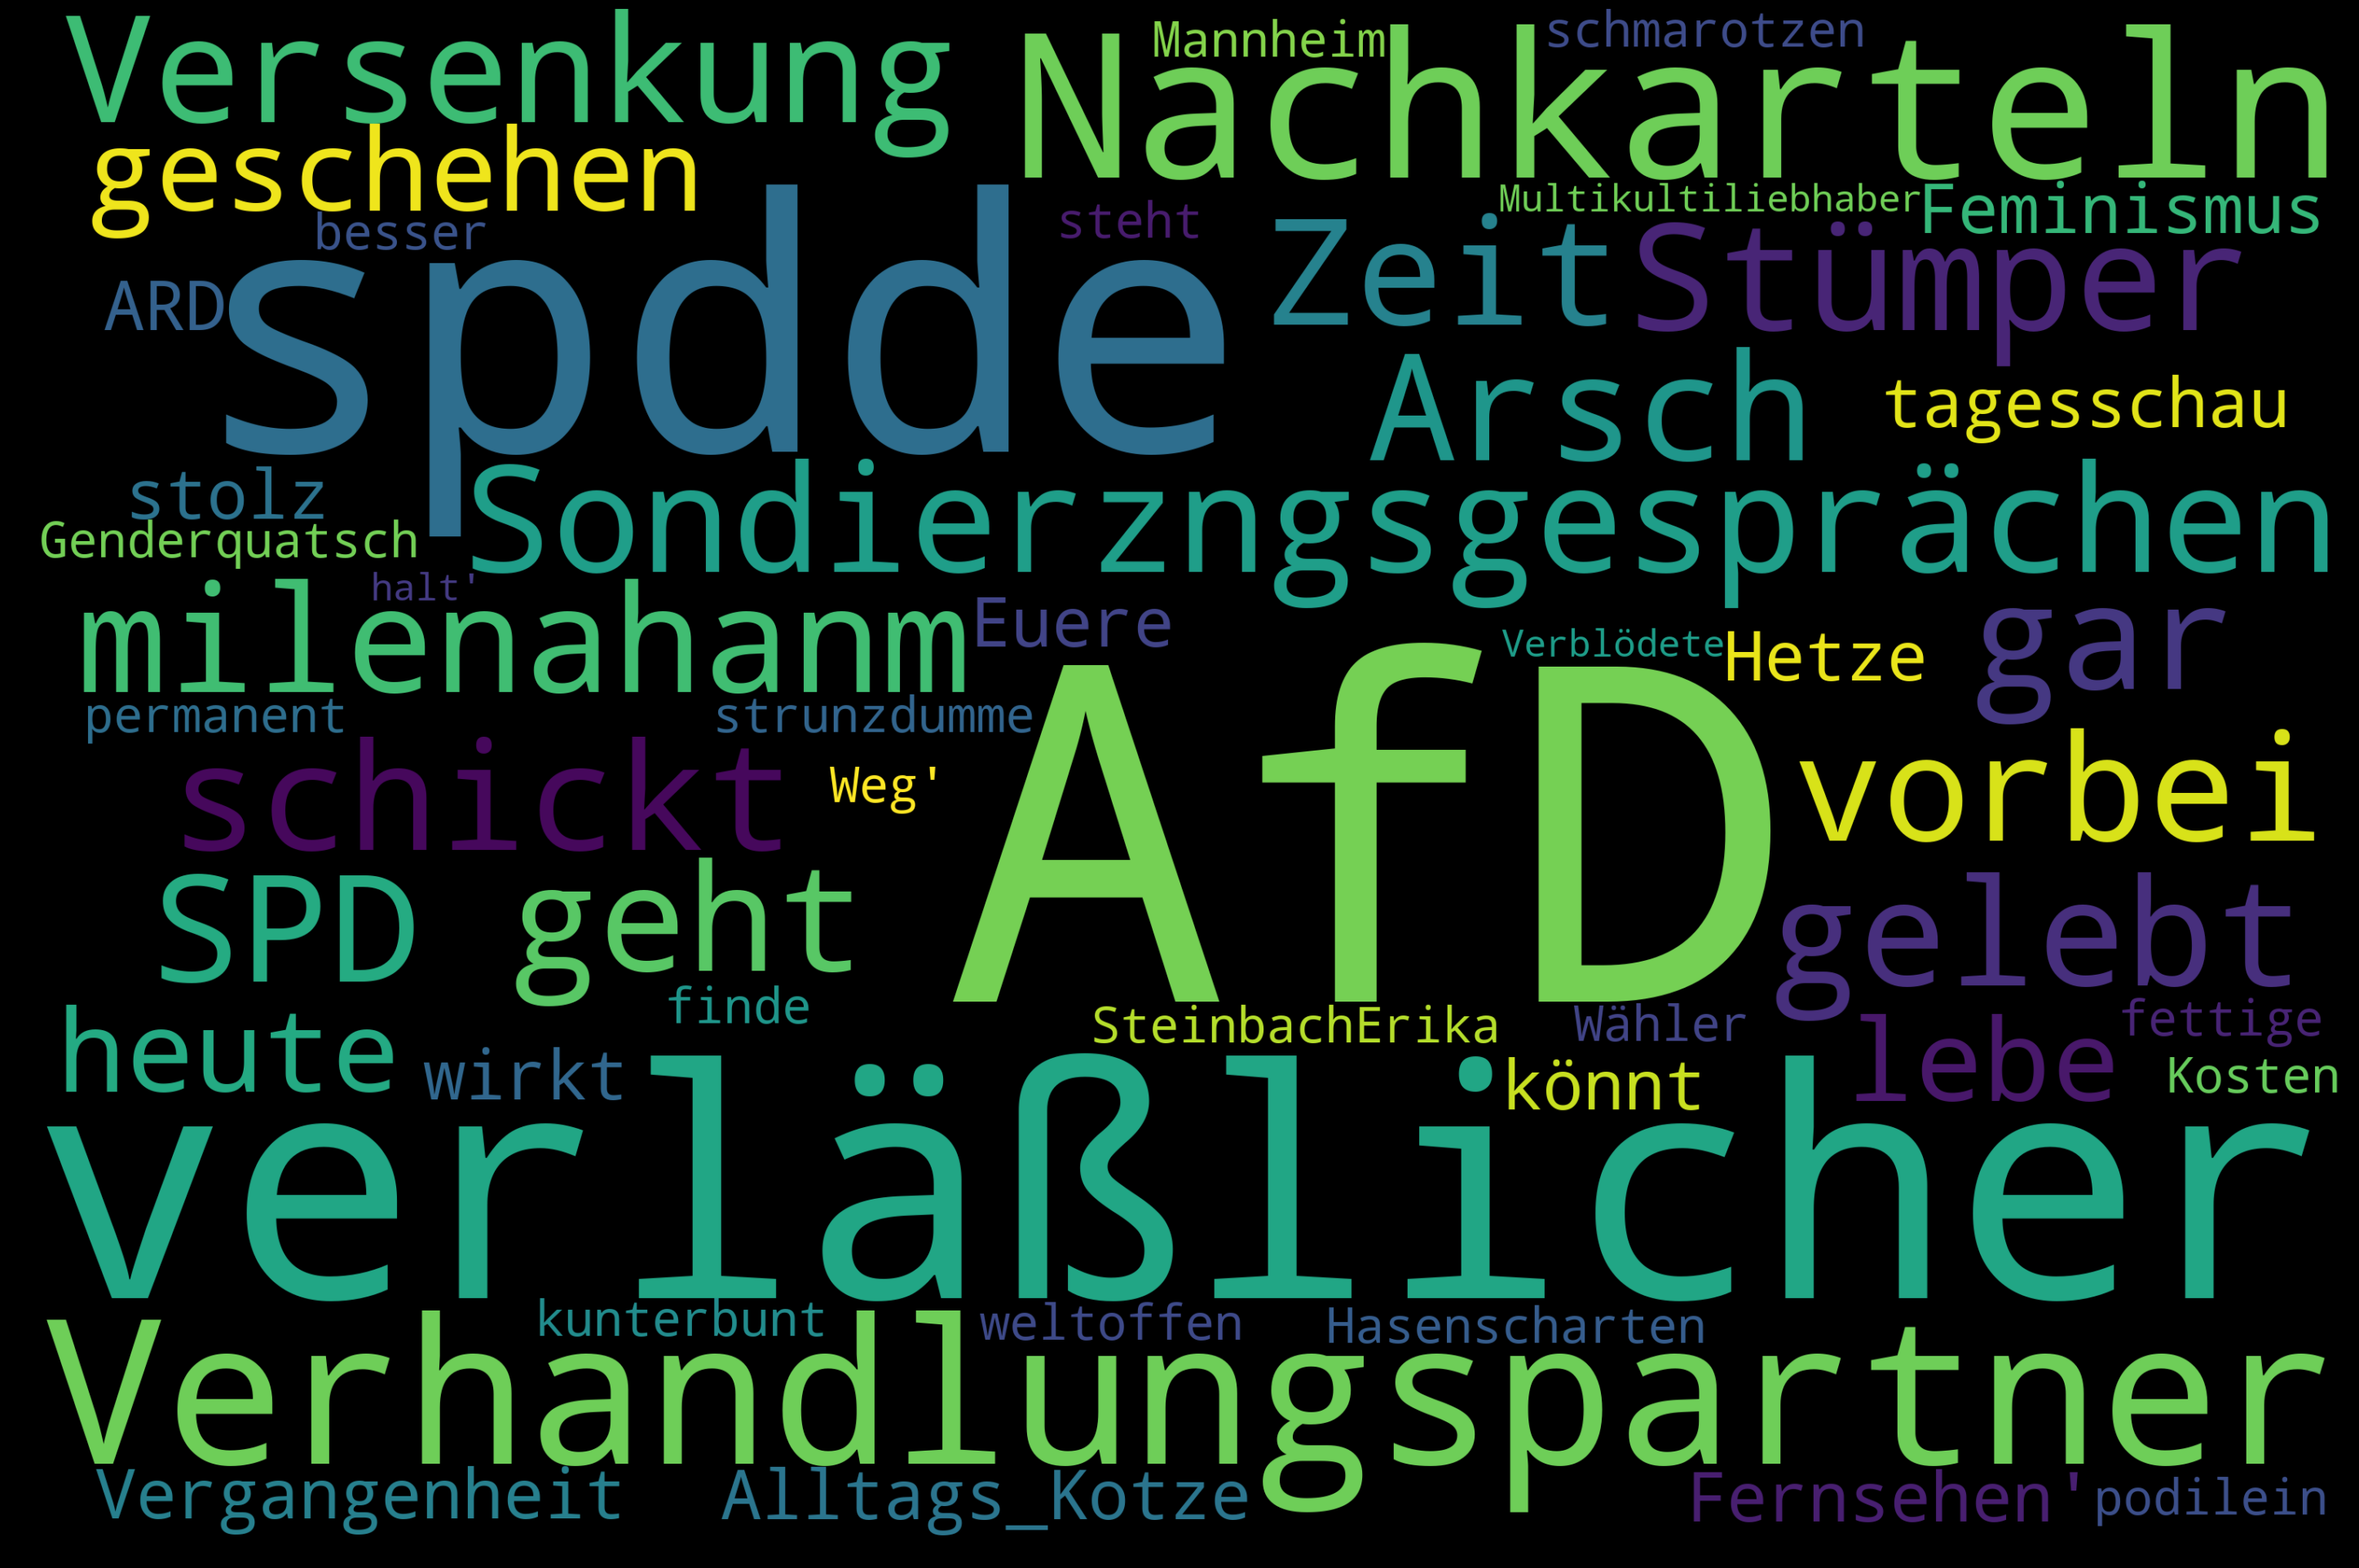

In [18]:
plot_word_cloud(EXPLICIT)